# Example Data Analysis in a Jupyter Notebook
This will demonstrate how the flow of a notebook makes data science tasks more intuitive for us as we work, and for others once its time to share our work.

So, let’s say you’re a data analyst and you’ve been tasked with finding out how the profits of the largest companies in the US changed historically.
You find a data set of Fortune 500 companies spanning over 50 years since the list’s first publication in 1955, put together from Fortune’s public archive.

As we shall demonstrate, Jupyter Notebooks are perfectly suited for this investigation. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('fortune500.csv')

In [3]:
df.head()


,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail()


,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


We have the columns we need, and each row corresponds to a single company in a single year.

Let’s just rename those columns so we can refer to them later.

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']


we need to explore our data set. Is it complete? Did pandas read it as expected? Are any values missing?

In [6]:
len(df)


25500

Okay, that looks good — that’s 500 rows for every year from 1955 to 2005, inclusive.

Let’s check whether our data set has been imported as we would expect. A simple check is to see if the data types (or dtypes) have been correctly interpreted.

In [7]:
df.dtypes


year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Uh oh. It looks like there’s something wrong with the profits column — we would expect it to be a float64 like the revenue column. This indicates that it probably contains some non-integer values, so let’s take a look.

In [8]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Just as we suspected! Some of the values are strings, which have been used to indicate missing data. Are there any other values that have crept in?

In [9]:
set(df.profit[non_numberic_profits])


{'N.A.'}

That makes it easy to interpret, but what should we do? Well, that depends how many values are missing.



In [10]:
len(df.profit[non_numberic_profits])


369

It’s a small fraction of our data set, though not completely inconsequential as it is still around 1.5%. If rows containing N.A. are, roughly, uniformly distributed over the years, the easiest solution would just be to remove them. So let’s have a quick look at the distribution.

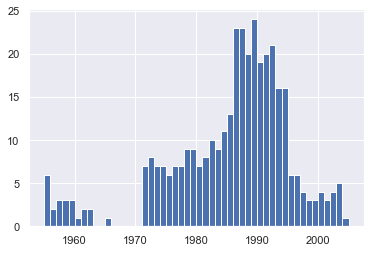

In [11]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))


At a glance, we can see that the most invalid values in a single year is fewer than 25, and as there are 500 data points per year, removing these values would account for less than 4% of the data for the worst years. Indeed, other than a surge around the 90s, most years have fewer than half the missing values of the peak. For our purposes, let’s say this is acceptable and go ahead and remove these rows.

In [12]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)


In [13]:
len(df)


25131

In [14]:
df.dtypes


year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

# Plotting with matplotlib
Next, we can get to addressing the question at hand by plotting the average profit by year. We might as well plot the revenue as well, so first we can define some variables and a method to reduce our code.

In [15]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

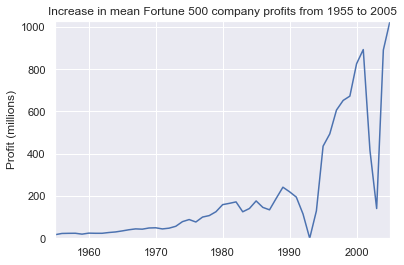

In [16]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

that looks like an exponential, but it’s got some huge dips. They must correspond to the early 1990s recession and the dot-com bubble. It’s pretty interesting to see that in the data. But how come profits recovered to even higher levels post each recession?

Maybe the revenues can tell us more.

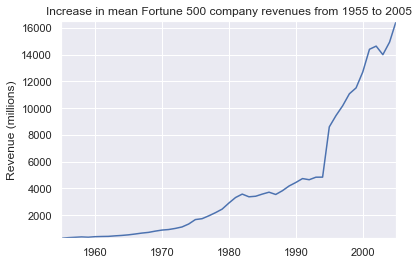

In [17]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')